In [ ]:
# !pip install xgboost -q

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
df=sns.load_dataset('diamonds')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
df.isnull().sum().sort_values(ascending=True)

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [6]:
df.shape

(53940, 10)

In [7]:
X=df.drop('cut',axis=1)
y=df['cut']

In [16]:
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])
y = le.fit_transform(y)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [22]:
%%time
model=RandomForestClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print("Accuracy score is:",accuracy_score(y_test,y_pred))
print("Precision score is:",precision_score(y_test,y_pred,average='micro'))
print("Recall score is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))


Accuracy score is: 0.7890248424175009
Precision score is: 0.7890248424175009
Recall score is: 0.7890248424175009
F1 score is: 0.7890248424175009
CPU times: user 12.2 s, sys: 11.9 ms, total: 12.2 s
Wall time: 12.3 s


In [24]:
%%time
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print("Accuracy score is:",accuracy_score(y_test,y_pred))
print("Precision score is:",precision_score(y_test,y_pred,average='micro'))
print("Recall score is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Accuracy score is: 0.7134779384501297
Precision score is: 0.7134779384501297
Recall score is: 0.7134779384501297
F1 score is: 0.7134779384501297
CPU times: user 679 ms, sys: 3.59 ms, total: 683 ms
Wall time: 1.35 s


In [25]:
%%time
model=XGBClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print("Accuracy score is:",accuracy_score(y_test,y_pred))
print("Precision score is:",precision_score(y_test,y_pred,average='micro'))
print("Recall score is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Accuracy score is: 0.8026510938079348
Precision score is: 0.8026510938079348
Recall score is: 0.8026510938079348
F1 score is: 0.8026510938079348
CPU times: user 6.89 s, sys: 44.2 ms, total: 6.93 s
Wall time: 4.9 s


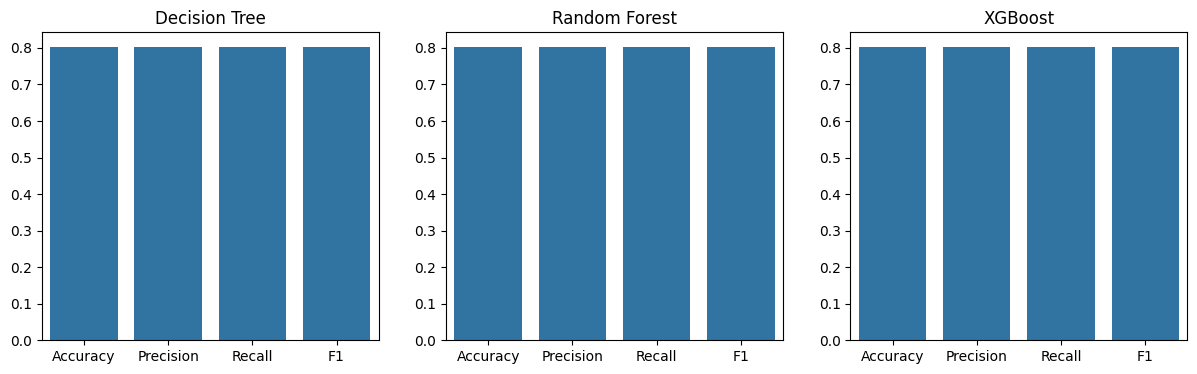

In [27]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()